---
# <div align="center"><font color='blue'>  Machine Learning  </font></div>
## <div align="center"> <font color='blue'> Building a Linear Regression Model to Predict Life Expectancy</font></div>
---

# Table of Contents

1. [Introduction](#Introduction)
2. [Reading data](#Reading-data)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Dropping any Null Values](#Dropping-any-Null-Values)
   - [Data Distribution](#Data-Distribution)
   - [Checking for Outliers](#Checking-for-Outliers)
   - [Feature Range](#Feature-Range)
   - [Feature Correlation](#Feature-Correlation)
   - [One hot encoding](#One-hot-encoding)
4. [Model development process](#Model-development-process)
   - [Performance Metric Goals](#Performance-Metric-Goals)
   - [Data Splitting](#Data-Splitting)
5. [Baseline Model](#Baseline-Model)
6. [Advanced Model](#Advanced-Model)
   - [Applying regularisation & Hyperparameter Tuning](#Applying-regularisation--Hyperparameter-Tuning)
7. [Discussing Ultimate Judgement](#Discussing-Ultimate-Judgement)
8. [Model Use Cases](#Model-Use-Cases)


# Introduction

This report will be outlining the process taken to build a linear regression model that will predict Life Expectancy based on the features from the aquired dataset. The data set has the following features:

- ID: row index
- TARGET-LifeExpectancy: Life Expectancy in age (years)
- Country: index of Country
- Year: Year
- Status: Developed or Developing status (0, 1)
- AdultMortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- AdultMortality-Female: Adult Mortality Rates of Female (probability of dying between 15 and 60 years per 1000 population)
- AdultMortality-Male: Adult Mortality Rates of Male (probability of dying between 15 and 60 years per 1000 population)
- SLS: Number of Short Life Span per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- PercentageExpenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average: Body Mass Index of entire population
- Under5LS: Number of under-five Life Span per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- TotalExpenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV-AIDS: Factor indicating between 0-4 years life span per 1000 HIV/AIDS
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- Thinness1-19years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- Thinness5-9years: Prevalence of thinness among children for Age 5 to 9(%)
- IncomeCompositionOfResources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Schooling indicator

# Reading data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./dataset/train.csv')

In [2]:
df.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


Dropping `ID` as it is not an attribute

In [3]:
df.drop(columns=['ID'], inplace=True)

# Exploratory Data Analysis (EDA)

## Dropping any Null Values

In [4]:
# Check if any column has null values
if df.isnull().any().any():
    print("Some columns have null values.")
else:
    print("No columns have null values.")


No columns have null values.


No null count rows to be dropped

## Data Distribution

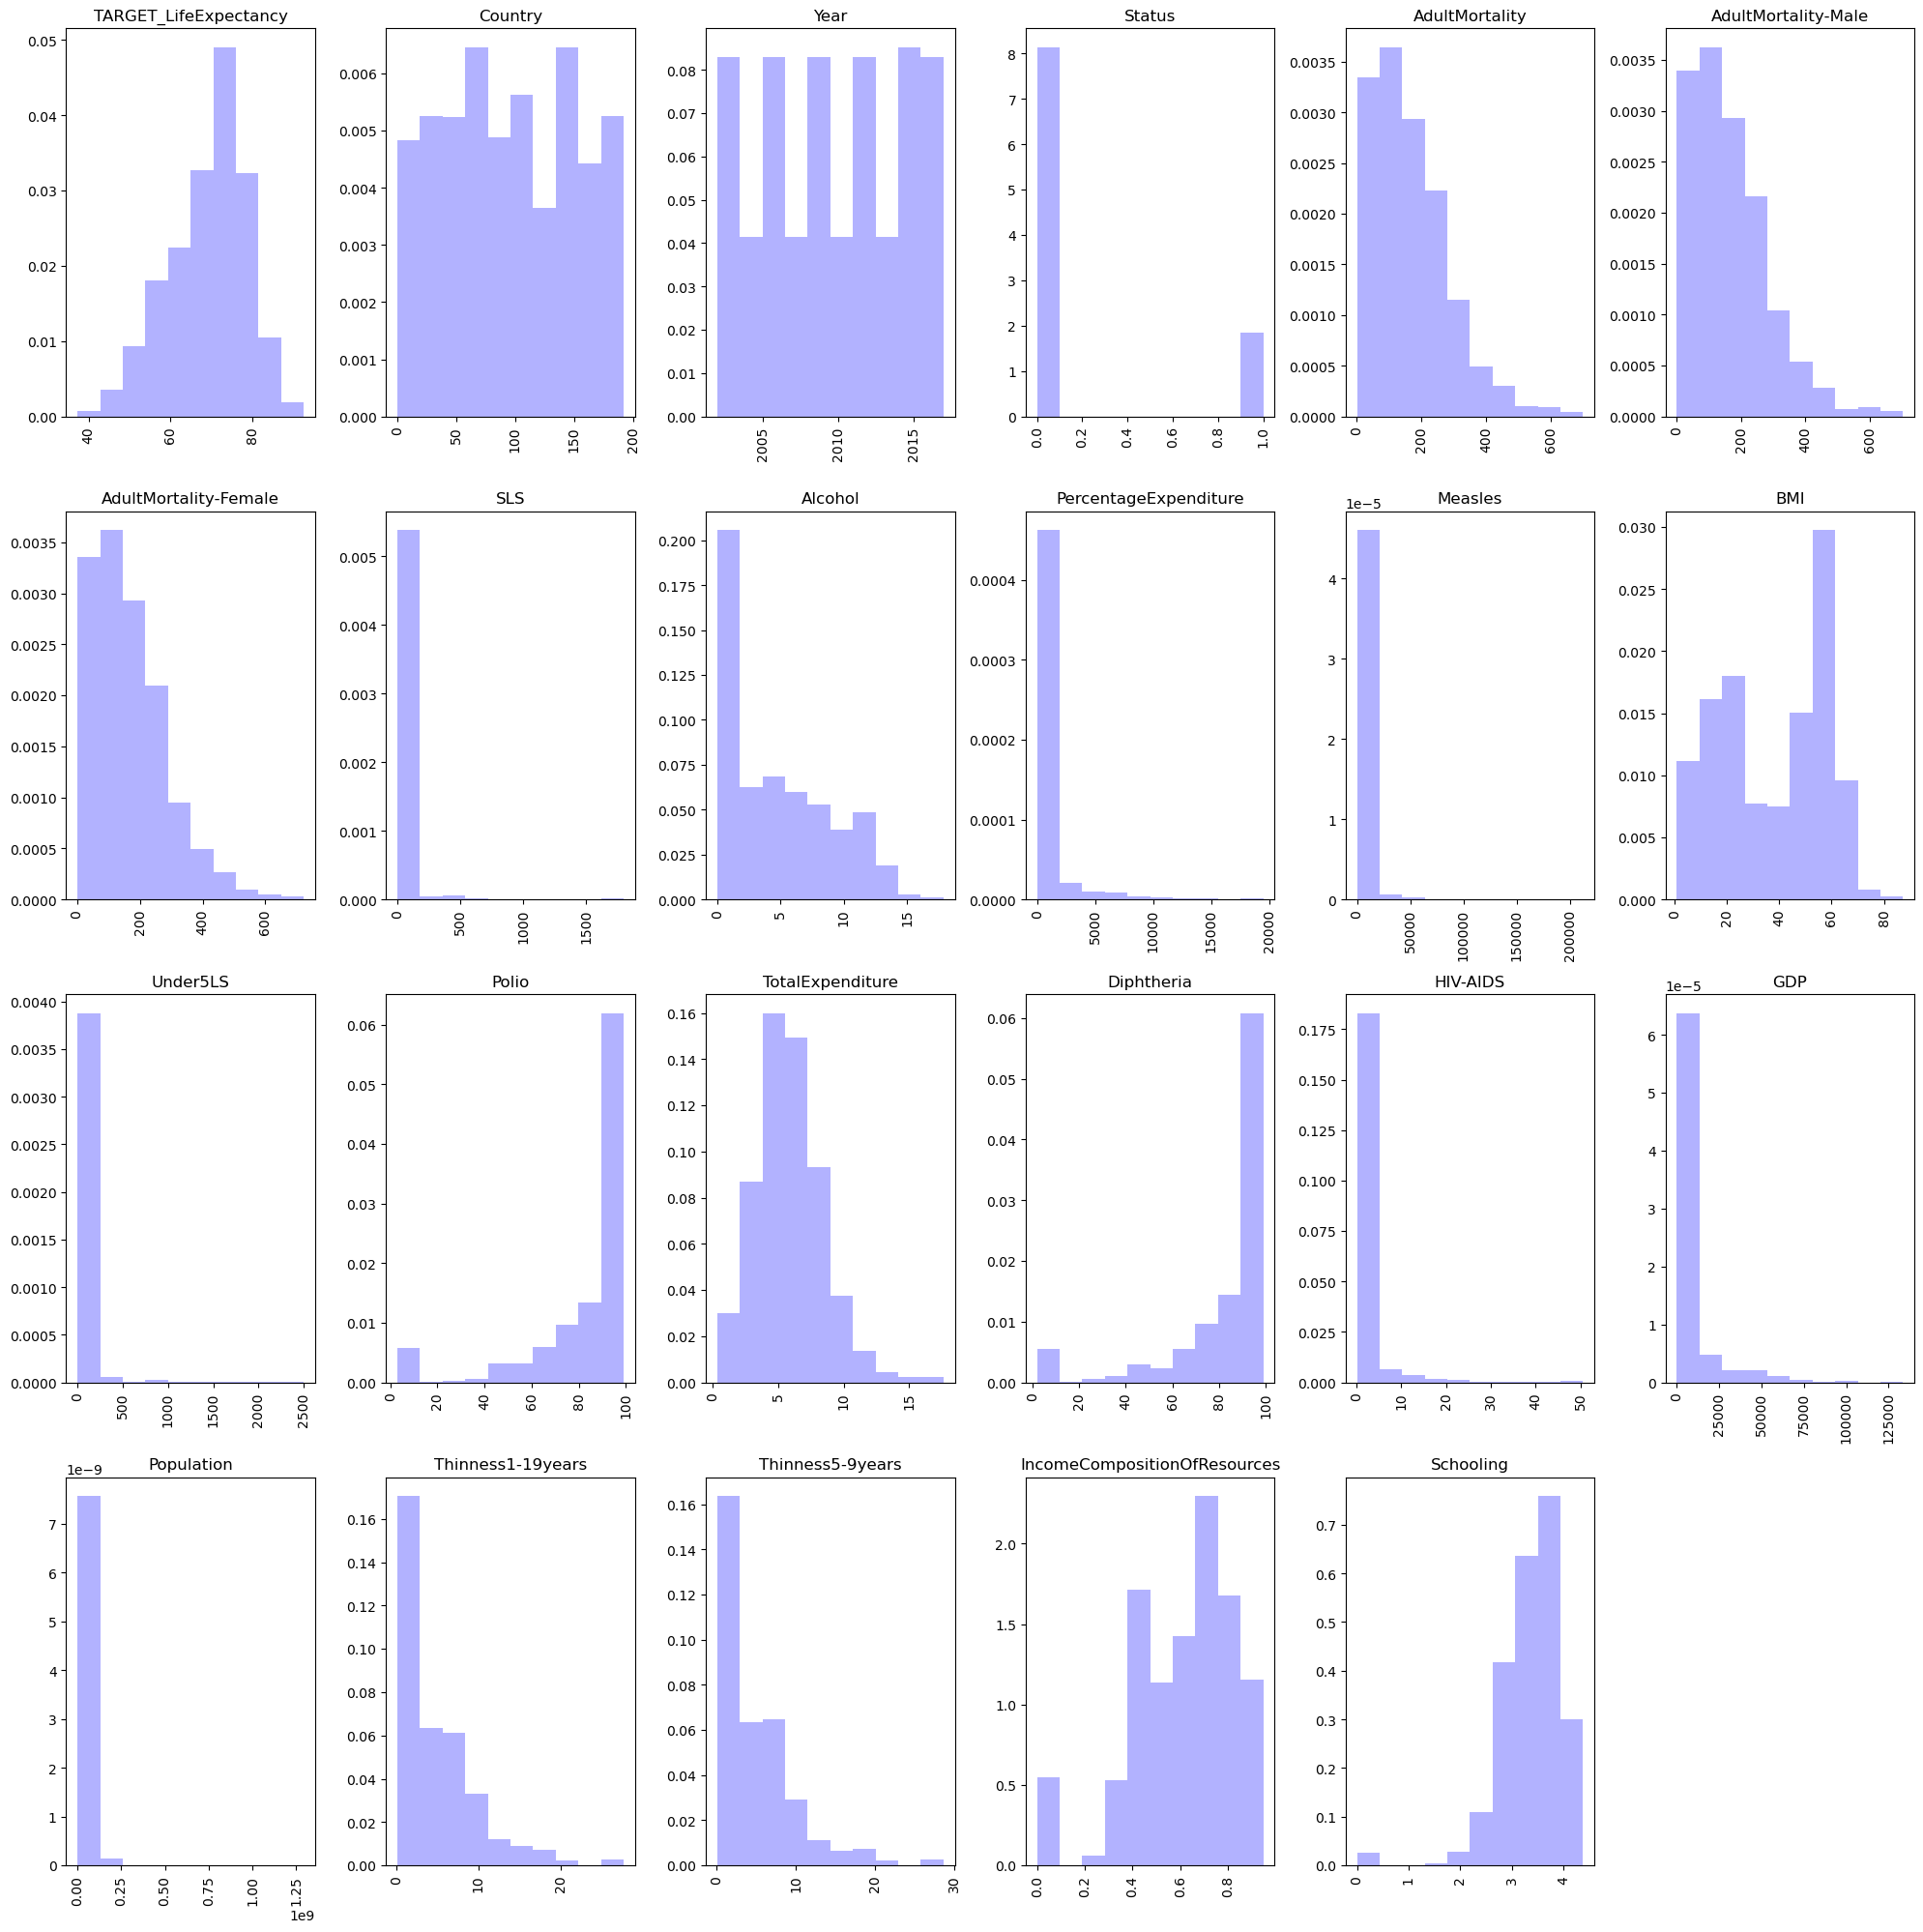

In [5]:
## checking TRAIN DATA SET's distribution for skews or outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    n, bins, _ = plt.hist(df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
#     # To get rid of scientific notation:
#     plt.ticklabel_format(style='plain', axis='y')
#     plt.ticklabel_format(style='plain', axis='x')

#     bin_sizes = bins[1:] - bins[:-1]
#     print(f"Column '{col}' - Bin sizes: {bin_sizes}")

plt.tight_layout()
plt.show()

- Skewed Features:
    - AdultMortality
    - AdultMortality-Male
    - AdultMortality-Female
    - SLS
    - Alcohol
    - PercentageExpenditure
    - Measles
    - Under5LS
    - Polio
    - TotalExpenditure
    - Diptheria
    - HIV-AIDS
    - GDP
    - Population
    - Thinness1-19years
    - Thinness5-9years
    - IncomeCompositionOfResources
    - Schooling
    
- Non-Skewed Features:
    - Country (Categorical)
    - Year
    - Status (Categorical)
    - BMI

## Checking for Outliers

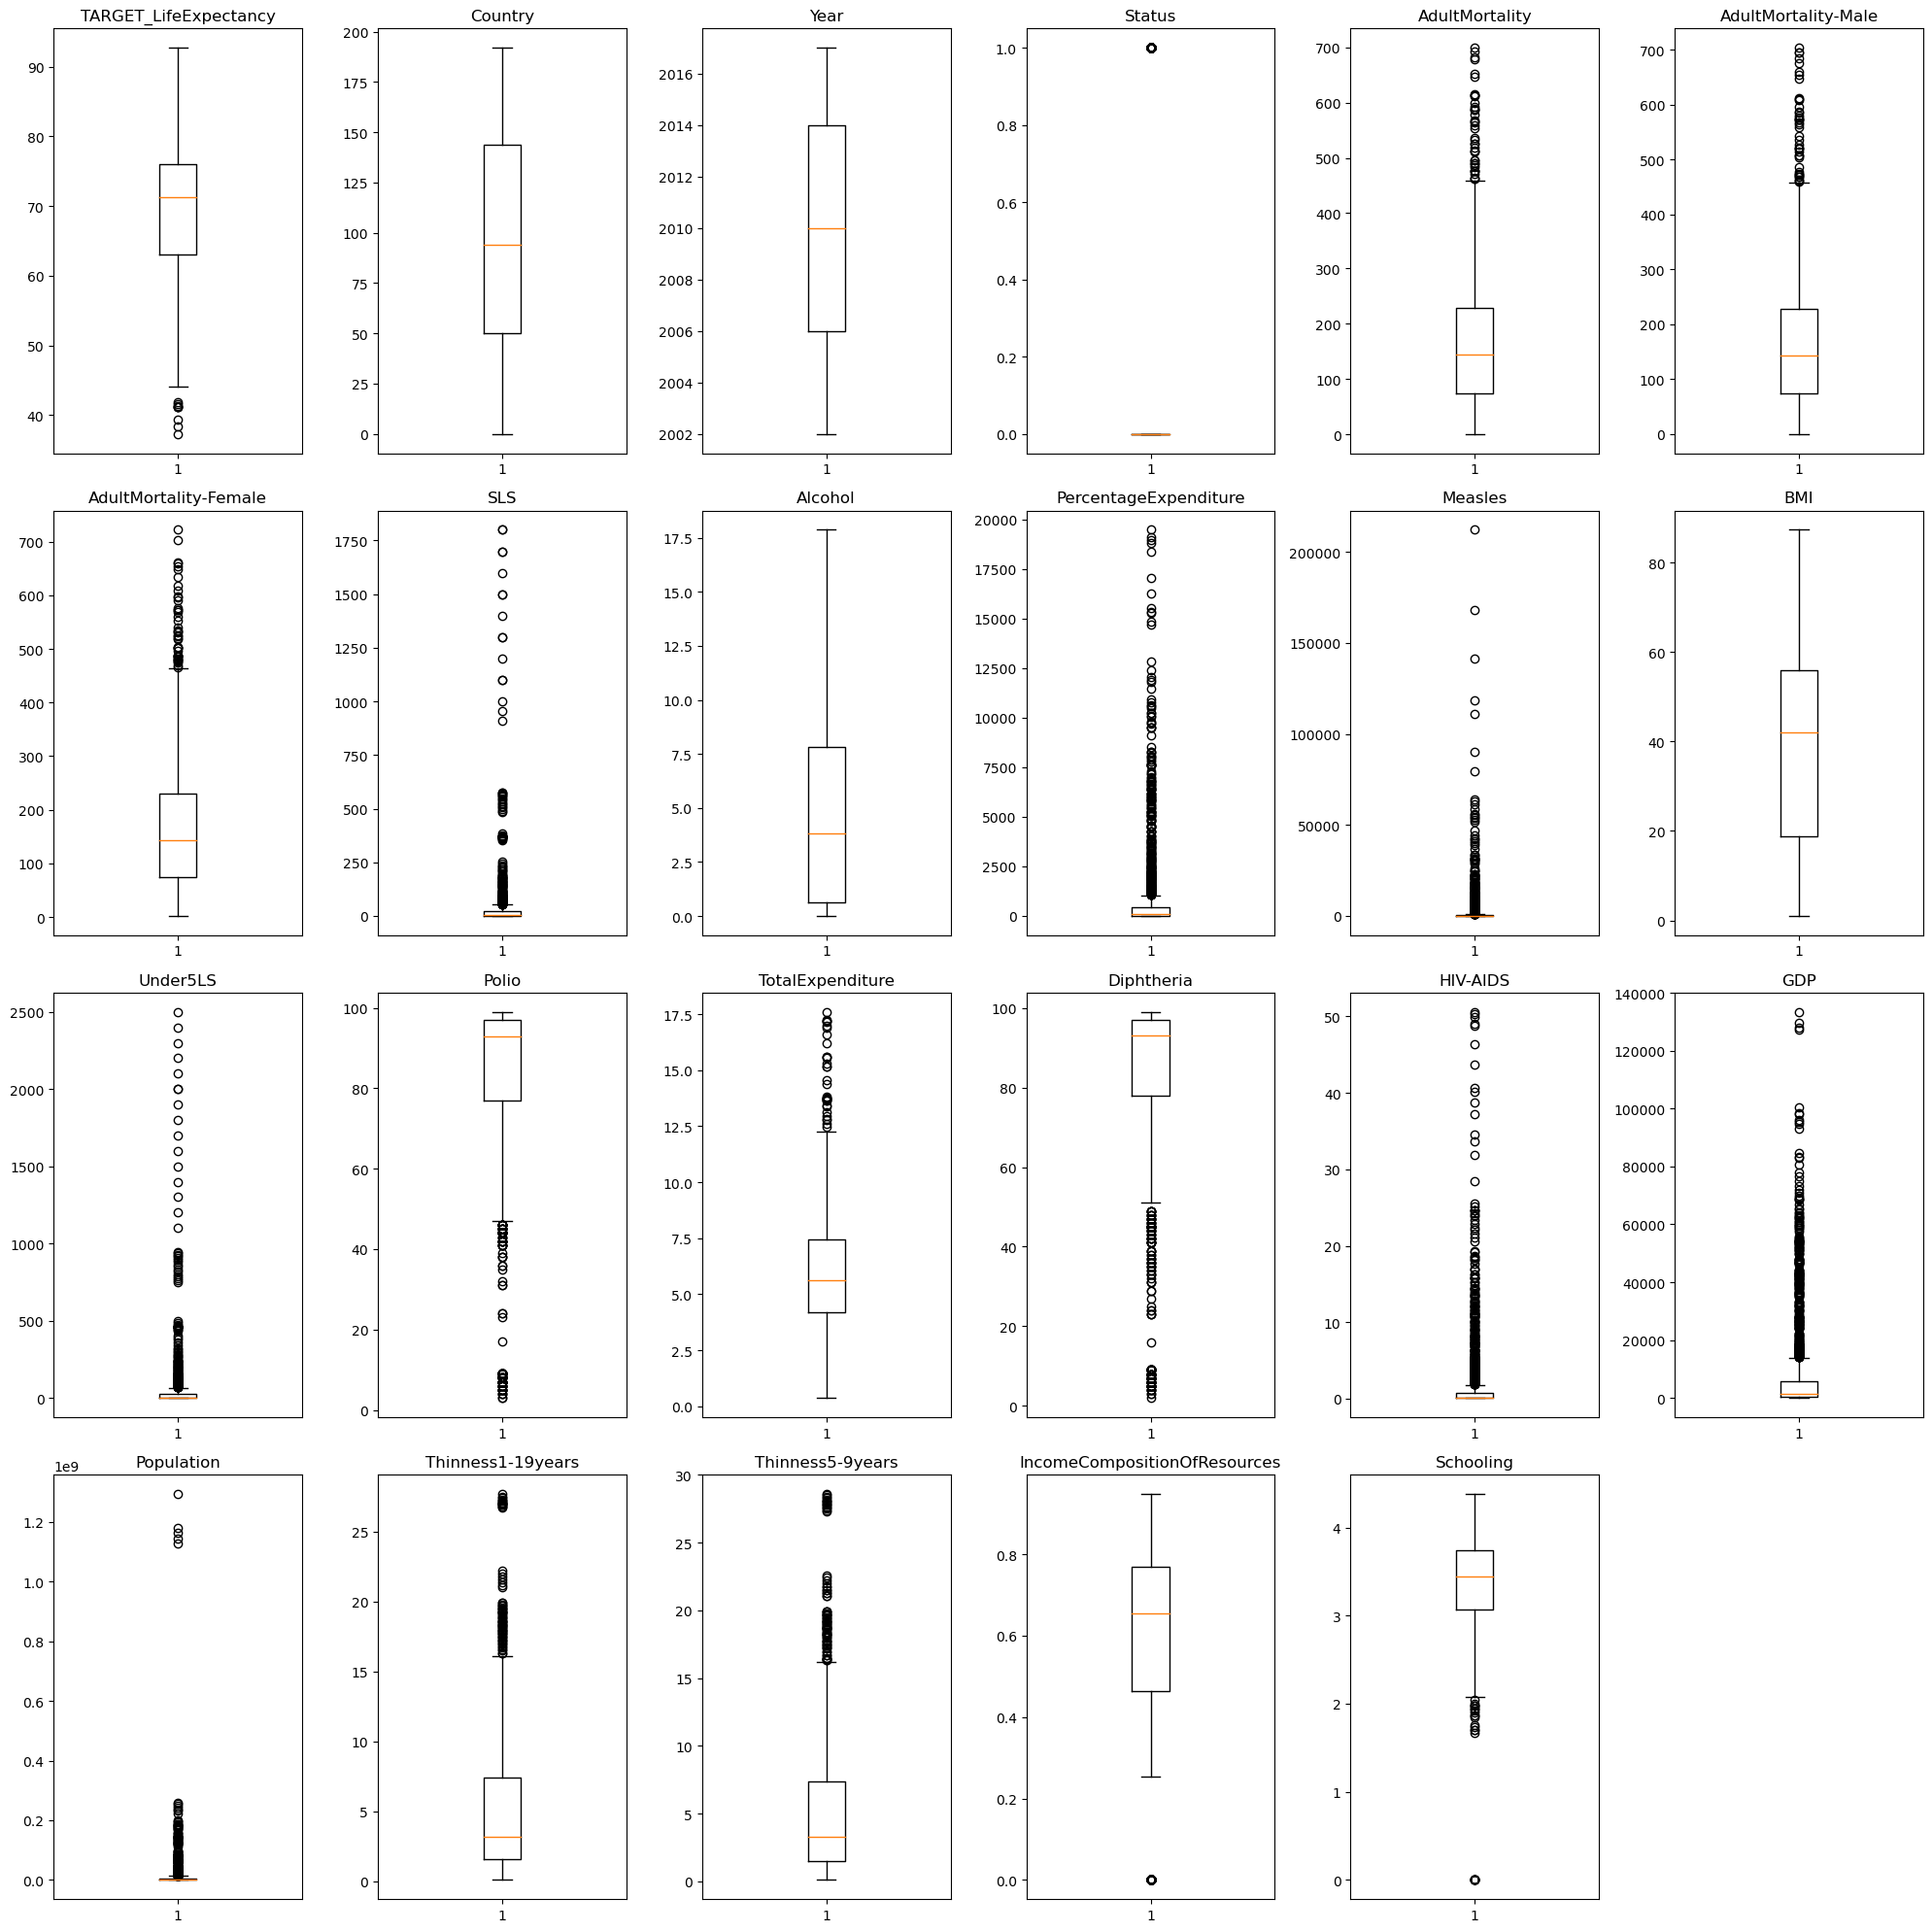

In [6]:
## checking train set's distribution for skews or outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- Among the skewed which ones have severe outlier:
    - Population, IncomeCompositionOfResources and Schooling
    - The features mentioned above will require standard scaling not minmax

## Feature Range

In [7]:
pd.set_option('display.max_columns', None)
df.describe()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,2095.747948,37.530662,45.886045,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,9959.531347,19.945437,185.254990,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,0.000000,18.700000,0.000000,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,19.000000,42.000000,4.000000,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,427.000000,55.900000,27.000000,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


All features will require scaling their ranges are so varied.

## Feature Correlation

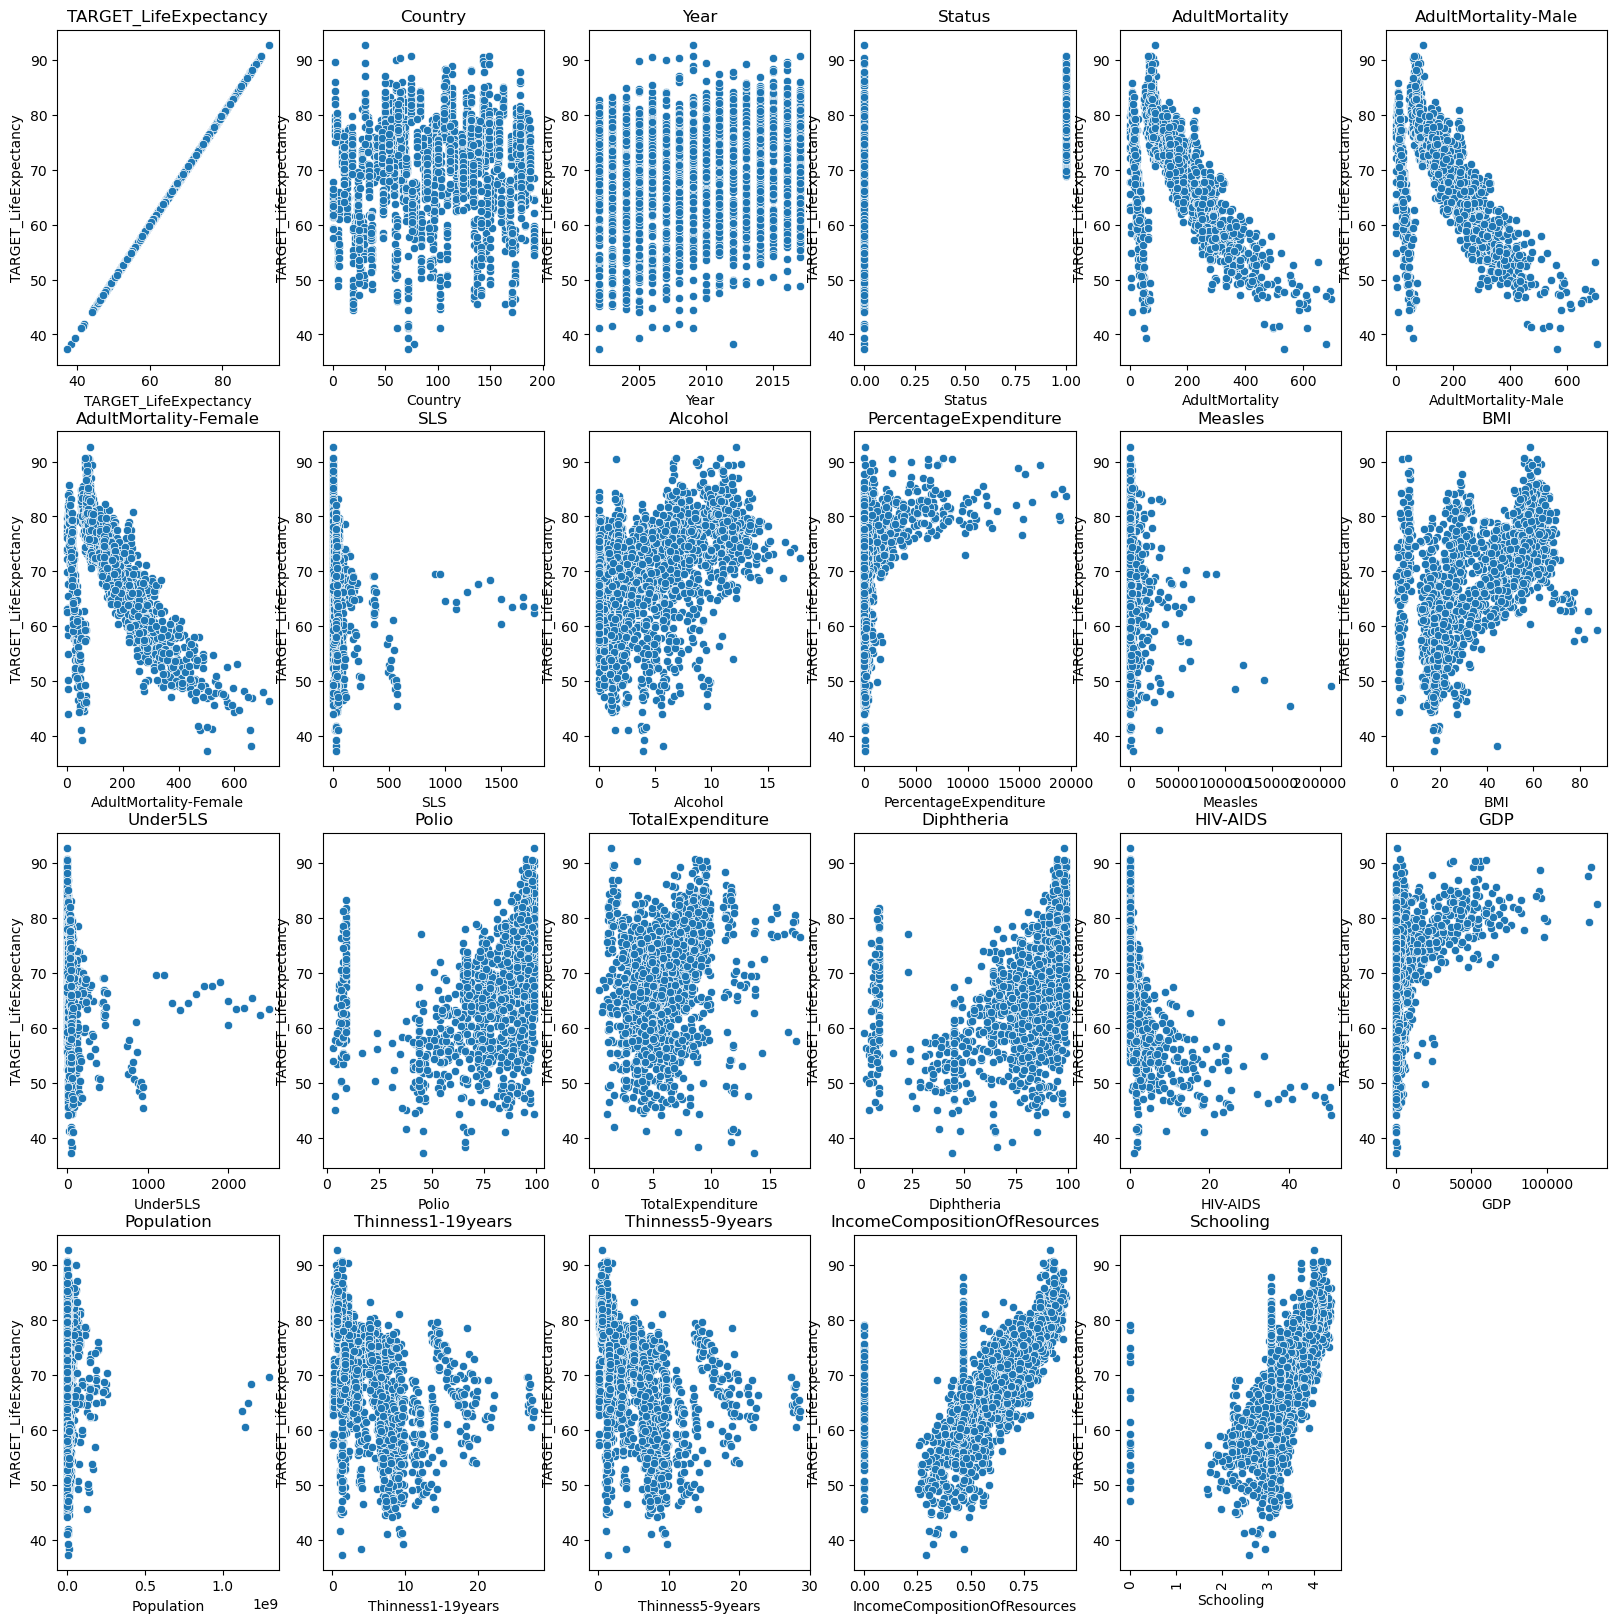

In [8]:
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    sns.scatterplot(data=df, x=col, y='TARGET_LifeExpectancy')
    # sns.regplot(x=col,y='TARGET_LifeExpectancy', data=df)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

- we observe linear relationship with Target feature in some features (e.g Schooling)
- we also observe non-linear relationship with Target feature in other features (e.g Adult Mortality)

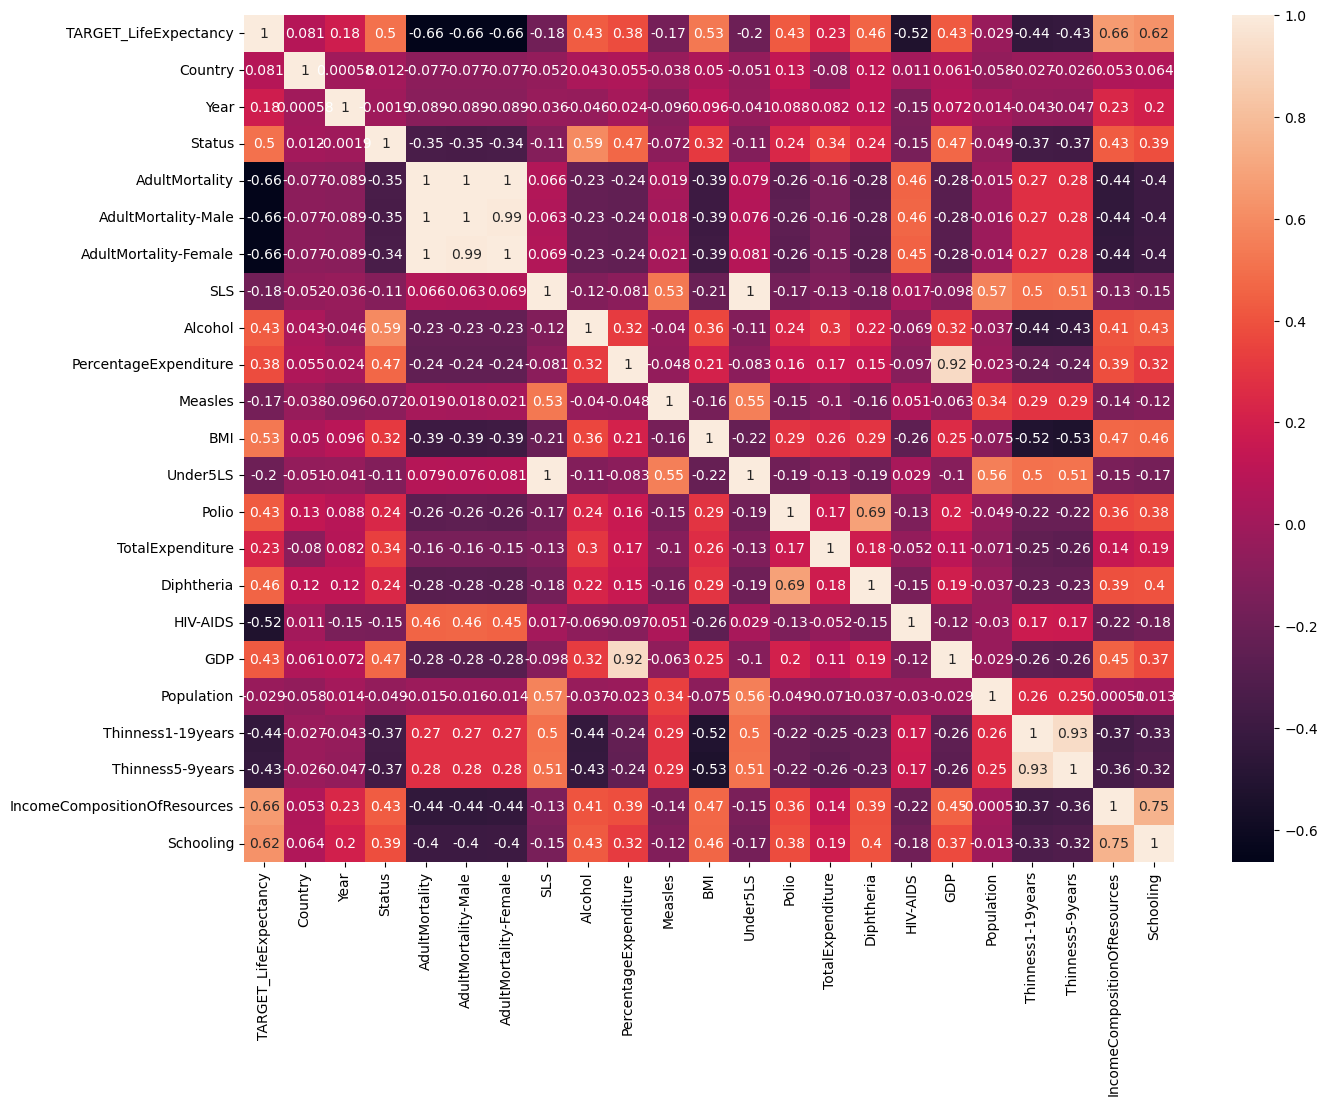

In [9]:
plt.figure(figsize=(15, 11))
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.show()

From the above heatmap we see `AdultMortality`, `AdultMortality-Female`, `AdultMortality-Male` are **highly** correlated to each other. This could lead to potential issues when building our model and its interpretability.

## One hot encoding

One hot encoding the 'Country' Feature in the data_train.csv

In [10]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_Country = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Country.fit(df[['Country']])

onehot_ = OneHotEncoder_Country.transform(df[['Country']]).toarray()

print(onehot_.shape, OneHotEncoder_Country.categories_)


(2071, 136) [array([  0,   2,   4,   5,   6,   9,  11,  13,  14,  15,  18,  19,  21,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  36,  37,
        39,  42,  43,  44,  46,  47,  48,  50,  51,  53,  54,  55,  57,
        58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  79,  80,  83,  84,  85,  86,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 100, 102, 103, 106, 107,
       108, 109, 111, 112, 114, 115, 117, 119, 122, 123, 124, 127, 128,
       131, 132, 134, 135, 136, 137, 138, 140, 141, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 160, 162,
       164, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 182, 183,
       184, 185, 186, 187, 188, 192], dtype=int64)]


In [11]:
# As seen above their are missing values Country index like Country 1, 120,121
# Also there are currently 195 countries in the world so
# We will also be adding columns for the missing countries up to 195

categories = OneHotEncoder_Country.categories_[0]

onehot_df = pd.DataFrame(onehot_, columns=[f'Country_{category}' for category in categories])

total_countries = 195
all_country_columns = [f'Country_{i}' for i in range(total_countries)]

# Reindex the onehot_df DataFrame with the complete list of country column names
onehot_df = onehot_df.reindex(columns=all_country_columns, fill_value=0)
onehot_df = onehot_df.apply(lambda x: x.astype(int))

# Concatenate the onehot_df DataFrame with the original DataFrame (df) along the columns axis
df = pd.concat([df, onehot_df], axis=1)

# Drop the original 'Country' column
df.drop(columns=['Country'], inplace=True)

df.head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Country_9,Country_10,Country_11,Country_12,Country_13,Country_14,Country_15,Country_16,Country_17,Country_18,Country_19,Country_20,Country_21,Country_22,Country_23,Country_24,Country_25,Country_26,Country_27,Country_28,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41,Country_42,Country_43,Country_44,Country_45,Country_46,Country_47,Country_48,Country_49,Country_50,Country_51,Country_52,Country_53,Country_54,Country_55,Country_56,Country_57,Country_58,Country_59,Country_60,Country_61,Country_62,Country_63,Country_64,Country_65,Country_66,Country_67,Country_68,Country_69,Country_70,Country_71,Country_72,Country_73,Country_74,Country_75,Country_76,Country_77,Country_78,Country_79,Country_80,Country_81,Country_82,Country_83,Country_84,Country_85,Country_86,Country_87,Country_88,Country_89,Country_90,Country_91,Country_92,Country_93,Country_94,Country_95,Country_96,Country_97,Country_98,Country_99,Country_100,Country_101,Country_102,Country_103,Country_104,Country_105,Country_106,Country_107,Country_108,Country_109,Country_110,Country_111,Country_112,Country_113,Country_114,Country_115,Country_116,Country_117,Country_118,Country_119,Country_120,Country_121,Country_122,Country_123,Country_124,Country_125,Country_126,Country_127,Country_128,Country_129,Country_130,Country_131,Country_132,Country_133,Country_134,Country_135,Country_136,Country_137,Country_138,Country_139,Country_140,Country_141,Country_142,Country_143,Country_144,Country_145,Country_146,Country_147,Country_148,Country_149,Country_150,Country_151,Country_152,Country_153,Country_154,Country_155,Country_156,Country_157,Country_158,Country_159,Country_160,Country_161,Country_162,Country_163,Country_164,Country_165,Country_166,Country_167,Country_168,Country_169,Country_170,Country_171,Country_172,Country_173,Country_174,Country_175,Country_176,Country_177,Country_178,Country_179,Country_180,Country_181,Country_182,Country_183,Country_184,Country_185,Country_186,Country_187,Country_188,Country_189,Country_190,Country_191,Country_192,Country_193,Country_194
0,67.1,2017,0,263,262,264,62,0.01,71.279624,1154,19.1,83,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59.8,2016,0,271,278,264,64,0.01,73.523582,492,18.6,86,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57.6,2015,0,268,246,290,66,0.01,73.219243,430,18.1,89,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Model development process

1. **Performance Metric Goals**: Performance metric and target value. Problem dependent.

2. **Setup the experiment**: Setup the test/validation data, visualisers and debuggers needed to determine bottlenecks in performance (overfitting/under-fitting, feature importance).

3. **Select Baseline Model**: Identify the components of end-to-end pipeline including - Baseline Models, cost functions, optimisation.

4. **Make incremental changes**: Repeatedly make incremental changes such as gathering new data, adjusting hyper-parameters, or changing algorithms, based on specific findings from your instrumentation.

## Performance Metric Goals


In this task, I aim to evaluate the performance of my linear regression model using various metrics,  will focus on achieving a target value of \(R^2\) equal to or greater than 0.80.

It's important to note that \(R^2\) is not the only performance measure suitable for evaluating linear regression models. Other metrics like MSE, RMSE, and MAE provide valuable insights into different aspects of the model's performance. Therefore, I will also consider these metrics to ensure a comprehensive evaluation of the model's predictive accuracy and goodness of fit.


In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def get_r2_rmse_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)

    train_r2 = r2_score(train_y, train_pred)
    val_r2 = r2_score(val_y, val_pred)

    train_rmse = mean_squared_error(train_y, train_pred, squared=False)
    val_rmse = mean_squared_error(val_y, val_pred, squared=False)

    return train_r2, val_r2, train_rmse, val_rmse

## Data Splitting

The validation technique to be used will be K-fold Cross Validation. This was chosen as K-fold Cross Validation reduces the variance of the evaluation metrics compared to Hold Out Validation because it averages the evaluation metrics over multiple iterations of training and testing on different subsets of data rather than just doing it once like Hold Out. Also, Cross Validation is also suitable for this dataset as it is relatively small (around 2000 instances)

Therefore, to perform Cross Validation, the dataset will be split into Training, Validating and Testing with a 60/20/20 respective split as shown below:



In [13]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(df, test_size=0.2,
                                              shuffle=True,random_state=0)

with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data_, test_size=0.25,
                                            shuffle=True,random_state=0)

print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

1242 414 415


Split into Features (X) and Target (Y)

In [14]:
train_X_base = train_data.drop(['TARGET_LifeExpectancy',], axis=1)
train_y = train_data[['TARGET_LifeExpectancy']]

test_X_base = test_data.drop(['TARGET_LifeExpectancy',], axis=1)
test_y = test_data[['TARGET_LifeExpectancy']]

val_X_base = val_data.drop(['TARGET_LifeExpectancy',], axis=1)
val_y = val_data[['TARGET_LifeExpectancy']]

# Baseline model

The baseline model I have selected based on my initial EDA is `linear regression`.

Linear Regression is justified because we have correlated attributes and in EDA we also had some features where a linear decision boundary looked appropriate. When building the baseline Model all the observations made previously during EDA will be considered.

Besides the Categorical (Country and Status) Features and the Features with Minimal Skew (Year, BMI) all other features were transformed to have a gaussian like distribution using Power Transformer. This was necessary as we discussed and saw in EDA as all these features showed skewing.  Particularly, standard scaling is done to the features with extreme outliers (as identified previously during EDA). This is because minmax scaling would distort these features because of their extreme outliers.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

standard_attributes = ['Schooling', 'Population', 'IncomeCompositionOfResources']
no_skew_attr = ['Year', 'Status', 'BMI']
# Adding all country_i columns to no_skew
country_columns = [col for col in df.columns if 'Country' in col]
no_skew_attr.extend(country_columns)
logNorm_attributes = list(set(train_X_base.columns).difference(set(no_skew_attr)))

X_train_scaled = train_X_base.copy()
X_test_scaled = test_X_base.copy()
X_val_scaled = val_X_base.copy()

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_X_base.loc[:, logNorm_attributes])
X_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(train_X_base.loc[:, logNorm_attributes])
X_test_scaled.loc[:, logNorm_attributes] = powertransformer.transform(test_X_base.loc[:, logNorm_attributes])
X_val_scaled.loc[:, logNorm_attributes] = powertransformer.transform(val_X_base.loc[:, logNorm_attributes])

standardscaler = StandardScaler().fit(X_train_scaled.loc[:, standard_attributes])
X_train_scaled.loc[:, standard_attributes] = standardscaler.transform(X_train_scaled.loc[:, standard_attributes])
X_test_scaled.loc[:, standard_attributes] = standardscaler.transform(X_test_scaled.loc[:, standard_attributes])
X_val_scaled.loc[:, standard_attributes] = standardscaler.transform(X_val_scaled.loc[:, standard_attributes])


In [16]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train_scaled, train_y)

train_r2, val_r2, train_rmse, val_rmse = get_r2_rmse_scores(clf, X_train_scaled, train_y, X_val_scaled, val_y)
print("Train R2-Score score: {:.3f}".format(train_r2))
print("Validation R2-Score score: {:.3f}".format(val_r2))
print("Train RMSE: {:.3f}".format(train_rmse))
print("Validation RMSE: {:.3f}".format(val_rmse))

Train R2-Score score: 0.921
Validation R2-Score score: 0.879
Train RMSE: 2.680
Validation RMSE: 3.329


In [17]:
y_test_pred = clf.predict(X_test_scaled)
r2_rplr = r2_score(test_y, y_test_pred)
rmse_rplr = mean_squared_error(test_y, y_test_pred, squared=False)
print('The final (TEST) R^2 score for the linear regression model is: {:.3f}'.format(r2_rplr))
print('The final (TEST) RMSE score for the regularised polynomial linear regression model is: {:.3f}'.format(rmse_rplr))


The final (TEST) R^2 score for the linear regression model is: 0.876
The final (TEST) RMSE score for the regularised polynomial linear regression model is: 3.242


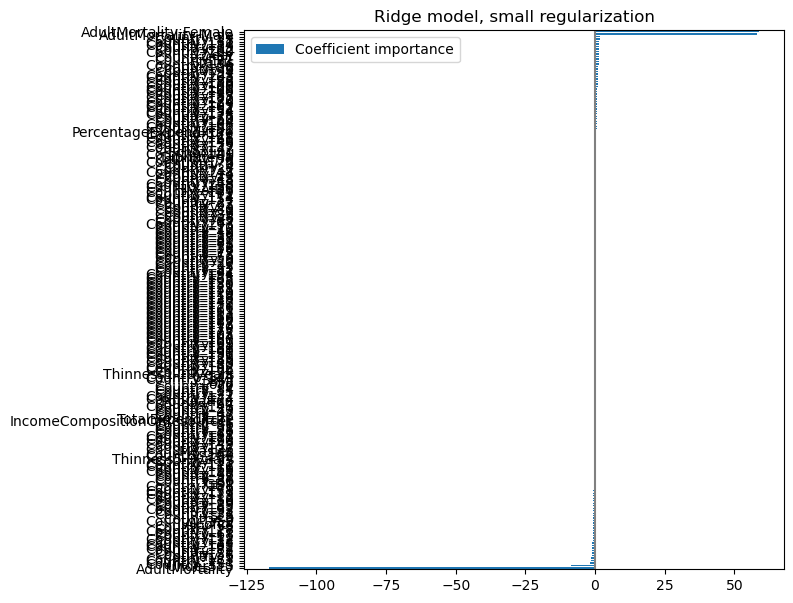

In [18]:

coefs = pd.DataFrame(
    (clf.coef_.flatten() * X_train_scaled.std(axis=0)),
    columns=['Coefficient importance'], index=X_train_scaled.columns
)

coefs.sort_values(by=['Coefficient importance']).plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

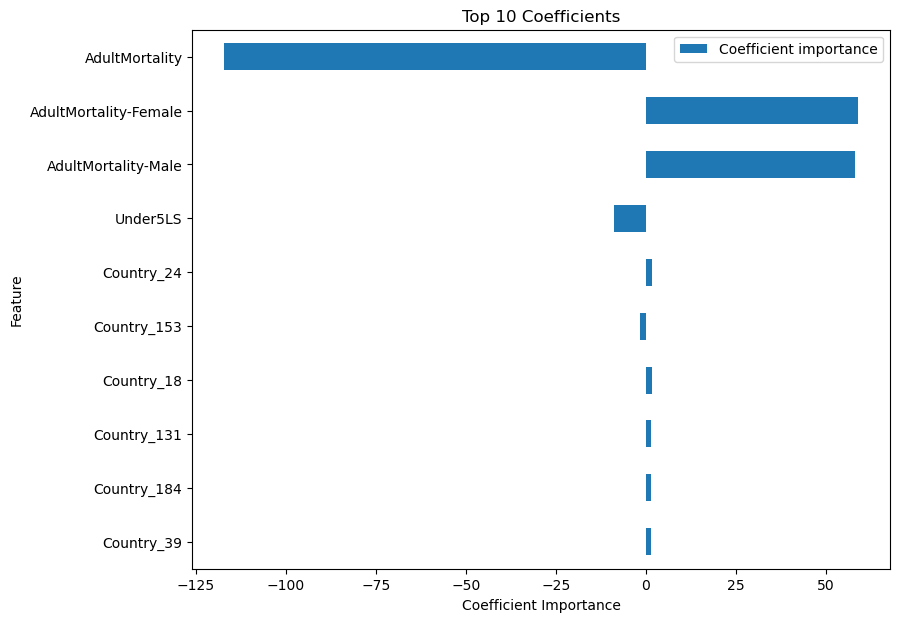

In [19]:
import matplotlib.pyplot as plt

# Number of top coefficients to display
n_top = 10

# Sort coefficients DataFrame by absolute values
coefs_sorted = coefs.reindex(coefs.abs().sort_values(by='Coefficient importance').index)

# Plot the top coefficients
top_coefs = coefs_sorted.tail(n_top)
top_coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Top {} Coefficients'.format(n_top))
plt.xlabel('Coefficient Importance')
plt.ylabel('Feature')
plt.show()


Convert to Numpy Array (for advanced model use later)

In [20]:
train_X = X_train_scaled.to_numpy()
train_y = train_y.to_numpy()

test_X = X_test_scaled.to_numpy()
test_y = test_y.to_numpy()

val_X = X_val_scaled.to_numpy()
val_y = val_y.to_numpy()


# Advanced model

I have decided to add onto my baseline model to do `regularised polynomial linear regression`.  The regularisation has been done with Ridge regression.

The polynomial model is justified because in the EDA we can see that a non-linear relationship between some features and the target feature.


In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)
val_X = poly.transform(val_X)


When using polynomial features it is very important to scale the features. Lets do a minmax normalisation. Again you can leverage the EDA to select the appropriate scaling mechanism.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)


Checking our check baseline linear model

In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(train_X, train_y.ravel())

train_r2, val_r2, train_rmse, val_rmse = get_r2_rmse_scores(clf, train_X, train_y, val_X, val_y)
print("Train R2-Score score: {:.3f}".format(train_r2))
print("Validation R2-Score score: {:.3f}".format(val_r2))
print("Train RMSE: {:.3f}".format(train_rmse))
print("Validation RMSE: {:.3f}".format(val_rmse))

Train R2-Score score: 1.000
Validation R2-Score score: -12.638
Train RMSE: 0.000
Validation RMSE: 35.281


For this task the baseline model achieved immaculate 100% training performance. However the performance gap between the Train Accuracy and the Validation Accuracy (generalisation GAP) is horrifically large. This means the model has overfitted to the training data immensly.


- To reduce this gap we can apply regularisation. The process is important. we start with our base model and then improve it based on our observations.

## Applying regularisation & Hyperparameter Tuning


When applying regularisation we need to select the lambda value. For this we will use:
- Grid search & k-fold cross validation: `GridSearchCV`


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define a range of alpha values to try
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create a dictionary of hyperparameters to search
param_grid = {'alpha': alphas}

# Define the scorer (R2 score)
scorer = make_scorer(r2_score)

# Create an Instance of the Ridge regression model
ridge_model = Ridge()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring=scorer, cv=5, return_train_score=True)

# Fit the grid search to find the best hyperparameters
grid_search.fit(train_X, train_y.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train Ridge regression model with the best hyperparameters
best_ridge_clf = Ridge(**best_params)
best_ridge_clf.fit(train_X, train_y.ravel())

# Evaluate the model
train_r2, val_r2, train_rmse, val_rmse = get_r2_rmse_scores(best_ridge_clf, train_X, train_y, val_X, val_y)

print("Best hyperparameters:", best_params)
print("Train R2-Score score with best hyperparameters: {:.3f}".format(train_r2))
print("Validation R2-Score score with best hyperparameters: {:.3f}".format(val_r2))
print("Train RMSE with best hyperparameters: {:.3f}".format(train_rmse))
print("Validation RMSE with best hyperparameters: {:.3f}".format(val_rmse))

Best hyperparameters: {'alpha': 10}
Train R2-Score score with best hyperparameters: 0.932
Validation R2-Score score with best hyperparameters: 0.895
Train RMSE with best hyperparameters: 2.477
Validation RMSE with best hyperparameters: 3.097


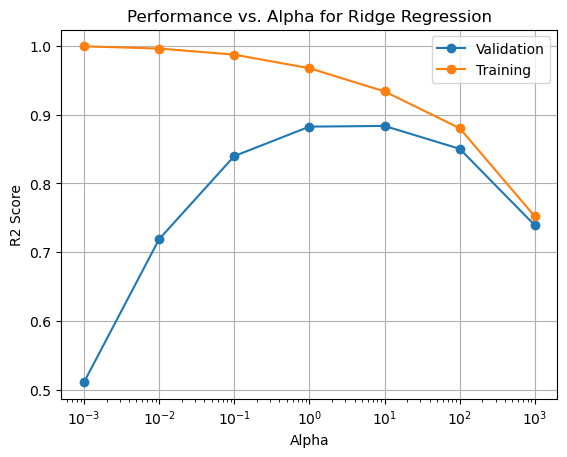

In [25]:
import matplotlib.pyplot as plt

# Extract alpha values and corresponding mean validation and training scores from GridSearchCV results
alphas = [params['alpha'] for params in grid_search.cv_results_['params']]
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_val_scores = grid_search.cv_results_['mean_test_score']

# Plot the alpha values against mean validation scores
plt.plot(alphas, mean_val_scores, marker='o', label='Validation')
plt.plot(alphas, mean_train_scores, marker='o', label='Training')


plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Performance vs. Alpha for Ridge Regression')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()


In [26]:

y_test_pred = best_ridge_clf.predict(test_X)
r2_rplr = r2_score(test_y, y_test_pred)
rmse_rplr = mean_squared_error(test_y, y_test_pred, squared=False)
print('The final (TEST) R^2 score for the regularised polynomial linear regression model is: {:.3f}'.format(r2_rplr))
print('The final (TEST) RMSE score for the regularised polynomial linear regression model is: {:.3f}'.format(rmse_rplr))


The final (TEST) R^2 score for the regularised polynomial linear regression model is: 0.902
The final (TEST) RMSE score for the regularised polynomial linear regression model is: 2.893


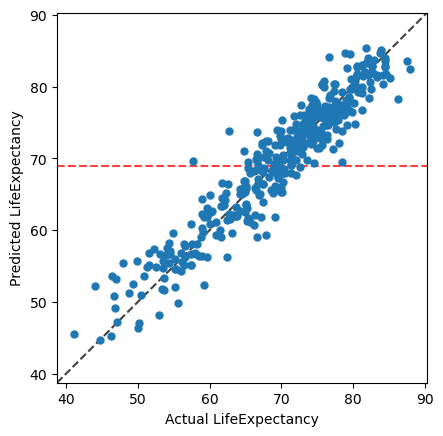

In [27]:
fig, ax = plt.subplots()
ax.scatter(test_y, y_test_pred, s=25, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(train_y),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual LifeExpectancy')
plt.ylabel('Predicted LifeExpectancy')

plt.show()

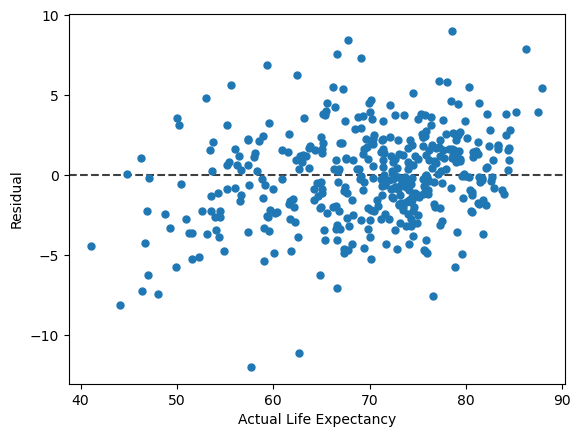

In [28]:
## Residual plots
fig, ax = plt.subplots()
test_y_reshaped = np.squeeze(test_y)

residual = np.subtract(test_y_reshaped,y_test_pred)
# print(test_y.size)
# print(y_test_pred.size)
# print(residual.size)
ax.scatter(test_y, residual , s=25, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residual')

plt.show()

# Discussing Ultimate Judgement

The baseline linear regression model performed extremely well and passed my goal of having an R2 score of 0.85 as it had the following metrics for train validate and test:

| Model Type                               |                    | Train    | Validation | Test    |
|------------------------------------------|--------------------|----------|------------|---------|
| Baseline Linear Regression               | R²                 | 0.921    | 0.879      | 0.876   |
|                                          | MSE                | 2.680    | 3.329      | 3.242   |
| Advanced Regularized Polynomial Regression| R²                | 0.932    | 0.895      | 0.902   |  
|                                          | MSE                | 2.477    | 3.097      | 2.893       |

However, as the highest contributing features to this model were shown to be Adult Mortality, Adult Mortality Female and Adult Mortality Male. These features are correlated to each other and thus this correlation may influence the baseline models performance. This was a limitation as these correlations influence on the model cannot be further investigated (with the material from weeks 1 to 4) and thus further exploration into this is recommended for this model’s future improvement.

The Advanced regularised polynomial linear regression model also performed extremely well and surpassed my initial goal of an R2 of 0.85.

This model addresses the non-linear relationships observed between some features and the target variable during EDA by employing polynomial features. Regularization was applied to address overfitting, resulting in a more generalizable model with improved performance. Despite the complexity introduced by polynomial features and regularization, the model still exhibits good interpretability and performance metrics.

# Model Use Cases

I will now discuss which model to use and when.

Considering the superior performance and generalisation of the advanced regularized polynomial linear regression model, it would be recommended over the baseline linear regression model. This recommendation is based on the model's ability to handle non-linear relationships, address overfitting through regularisation, and achieve higher R² scores across all evaluation metrics. Additionally, the improvement in performance after hyperparameter tuning suggests that the advanced model is better optimised for the dataset.

However, the baseline linear regression model might be recommended in certain scenarios where simplicity and interpretability are prioritised over slightly improved predictive performance.
    
- For example, if stakeholders require a straightforward explanation of the model's predictions and the factors influencing life expectancy, the simplicity of the baseline linear regression model might be favoured. Its straightforward coefficients can be easily interpreted to understand the impact of each feature on life expectancy.
- Additionally, in situations where computational resources are limited or there are constraints on model complexity, the baseline model's simplicity might be advantageous. It requires less computational power and fewer resources to train and deploy compared to more the more complex advanced model, which may be advantageous when working with really large datasets (millions of instances).